#### 기사 헤드라인 크롤

In [1]:
from selenium import webdriver as wb #브라우저 연동 등의 조작을 제어하는 도구 - 크롬창의 역할
from selenium.webdriver.common.keys import Keys #컴퓨터용 키보드 조작을 도와주는 도구
from selenium.webdriver.common.by import By #특정 선택자에 접근할 수 있는 도구
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from tqdm import tqdm

import time  #데이터 로딩 time(기다림)
import pandas as pd

In [67]:
#링크 잘리지 않게 하기 위한 옵션
pd.set_option('display.max_colwidth', None)

driver = wb.Chrome()

url = 'https://www.naver.com/'
driver.get(url)
# driver.find_element(By.CLASS_NAME, 'service_icon.type_news').click()

search = driver.find_element(By.CLASS_NAME , 'search_input')
search.send_keys('신혼, 가전, 기능 -광고 -협찬 -여행 -청약 -아파트' ,Keys.ENTER)
driver.find_element(By.CSS_SELECTOR, '#main_pack > section.sc_new.sp_nnews._prs_nws_all > div > div.mod_more_wrap > a').click()
driver.find_element(By.XPATH, '//*[@id="snb"]/div[1]/div/div[1]/a[2]').click()

for i in range(1,20) : 
    body = driver.find_element(By.TAG_NAME, 'body')
    body.send_keys(Keys.END)
    time.sleep(2) 

titles = driver.find_elements(By.CLASS_NAME, 'news_tit')  # 뉴스 타이틀 클래스 찾기
bonmun = driver.find_elements(By.CSS_SELECTOR, '.api_txt_lines.dsc_txt_wrap') #본문 1단

news_titles = []

for i in range(len(titles)):
    news_titles.append({'Title' : titles[i].text , 'Bonmun' : bonmun[i].text ,'link' : titles[i].get_attribute('href')}, )

total_craw = pd.DataFrame(news_titles)
total_craw.to_csv('./신혼가전기능.csv', encoding='utf-8', index=False)

driver.quit()

# # 타이틀 목록 저장
# news_titles = [title.text for title in titles]

# # 결과 출력
# for idx, title in enumerate(news_titles, 1):
#     print(f"{idx}: {title}")

In [96]:
total_craw['Title']

0        소형 밥솥 제품 강화 이유 있네...쿠첸, "다인 가구도 작은 가전 선호"
1                      “다인 가구도 작은 제품 선호”…소형가전 인기 ↑
2                “20대 신혼부부에 냉장고·세탁기·침대 구입 비용 드립니다”
3                “20대에 결혼하면 세탁기, 냉장고, 침대 구입 비용 지원”
4        [미리보는 이데일리 신문]눈덩이 환차손, 긴축경영도 안통해…中企 도산...
                          ...                     
385          [르포] "떨어져 사는 부모님 집 AI 가전과 함께 어르신 모신다"
386        “평소보다 활동 부족” 경고 메시지…떨어져 사는 부모 위한 AI 솔루션
387    “엄마! 어디 계세요!”…몇시간 동안 미동 없자 S24 울리고 로봇청소기...
388               삼성전자, '모두를 위한 AI'… AI 라이프 솔루션 공개
389          "집에 딸 왔으니 공기청정기 작동"…삼성전자가 여는 'AI 라이프'
Name: Title, Length: 390, dtype: object

In [169]:
total_craw['Bonmun']

0           6%)과 기능(34.3%)에 비중을 두는 경우가 많았다. 이어 편리성(17.0%), 디자인(14.0%) 순이었다. 전체 응답자 대상으로 향후 소형가전을 구매하거나 사용할... '브레인 미니' 밥솥은 쿠첸의 스테디셀러 '브레인' 밥솥을 1인 가구, 신혼 부부 등 소형가구가 사용하기 적합한 3인용 밥솥으로 선보인 제품이다....
1                  6%)과 기능(34.3%)에 비중을 두는 경우가 많았다. 이어 편리성(17.0%), 디자인(14.0%)순이었다. 전체 응답자 대상으로 향후 소형가전을 구매하거나 사용할... ‘브레인 미니’ 밥솥은 쿠첸의 스테디셀러 ‘브레인’ 밥솥을 1인 가구, 신혼 부부 등 소형가구가 사용하기 적합한 3인용 밥솥으로 선보인...
2                  20대 신혼부부에게 가구당 100만원의 혼수비용을 지급한다. 3∼4월 시·군 수요를 파악해 사업을 추진하며 세탁기, 냉장고, 침대 등 가전·가구... 여성에게는 난소 기능검사(AMH)와 부인과 초음파 검사를, 남성에게는 정액검사와 정자 정밀 형태 검사를 지원한다. 난임 부부에게 실질적인 도움을 제공하기 위해...
3                        3∼4월 시·군 수요를 파악해 사업을 추진하며 세탁기, 냉장고, 침대 등 가전·가구 구입비용을 지원한다. 구미시는 4월부터 신혼부부에게 카드형 구미... 여성에게는 난소 기능검사(AMH)와 부인과 초음파 검사를, 남성에게는 정액검사와 정자 정밀 형태 검사를 지원한다. 난임 부부에게 실질적인 도움을...
4                       연락두절 -“신혼인 딸 불쌍해 어쩌나” 거대한 빈소 된 무안공항 △초유의 ‘대대행’ 체제 -여객기 참사 수습 나선 경제사령탑… 내년 경제정책방향... 각자도생 -시각보조앱 기능 강화한 삼성… 장애인 교육활동 확대한 LG -일반 소비자에 이어…삼성전자 ‘AI 가전’, 사업자 공략 잰걸음 -경제계 리더...
                         

In [232]:
from kiwipiepy import Kiwi
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from PIL import Image #마스크 씌울 목적
import numpy as np
kiwi = Kiwi()
import random

import re
def preprocess_sentence_kr(w):
  w = w.strip()
  # w = re.sub(r"[^0-9가-힣A-Za-z?.!,¿]+", " ", w)
  w = re.sub(r"(?<=\b)'|'(?=\b)|(?<=\w),", "", w)
  w = w.strip()
  return w

In [223]:
prepro = [j for i in total_craw['Title'] for j in i.split(" ")]

prepro

['소형',
 '밥솥',
 '제품',
 '강화',
 '이유',
 '있네...쿠첸,',
 '"다인',
 '가구도',
 '작은',
 '가전',
 '선호"',
 '“다인',
 '가구도',
 '작은',
 '제품',
 '선호”…소형가전',
 '인기',
 '↑',
 '“20대',
 '신혼부부에',
 '냉장고·세탁기·침대',
 '구입',
 '비용',
 '드립니다”',
 '“20대에',
 '결혼하면',
 '세탁기,',
 '냉장고,',
 '침대',
 '구입',
 '비용',
 '지원”',
 '[미리보는',
 '이데일리',
 '신문]눈덩이',
 '환차손,',
 '긴축경영도',
 '안통해…中企',
 '도산...',
 '1인가구부터',
 '신혼부부',
 '겨냥',
 "'키친",
 "매직템'",
 '주목',
 'NS홈쇼핑,',
 '로봇청소기',
 "'로보락",
 'QRevo',
 "S'",
 '론칭',
 '방송…최저가',
 '혜택과',
 '이벤...',
 '미엘루,',
 '오존·살균',
 '기능',
 '갖춘',
 "'스마트",
 '자동',
 '쓰레기통',
 '클래식',
 "20L'",
 '출시',
 '[출근길',
 '인터뷰]',
 '추억의',
 '용산전자상가…변천사',
 '담은',
 '특별전',
 '글로벌',
 '가전',
 '브랜드',
 '하이얼(Haier),',
 '올인원',
 '콤팩트',
 '로봇청소기',
 'D50',
 'PRO',
 '판...',
 '하이얼',
 'Haier,',
 '올인원',
 '콤팩트',
 '로봇청소기',
 'D50',
 'PRO',
 '신제품',
 '출시',
 '하이얼(Haier),',
 '올인원',
 '콤팩트',
 '로봇청소기',
 '‘D50',
 'PRO’',
 '신제품',
 '출시',
 '경기불황·고물가에',
 '짠물',
 '소비…중고거래·1인가구',
 '제품',
 '급증',
 '제니퍼룸,',
 '커피머신·홈카페',
 '선물',
 '주목',
 '[기자의',
 '시각]',
 '中',
 '가전에',
 '있고',
 '韓',
 '가전에',
 '없는',
 '것

In [224]:
Counter(prepro)

Counter({'AI': 82,
         "'AI": 48,
         '가전': 47,
         'LG전자,': 34,
         '삼성전자,': 33,
         '판매': 32,
         '150만대': 31,
         "가전'": 30,
         '돌파': 27,
         '고객': 25,
         '신혼부부': 23,
         '삼성스토어,': 21,
         '오픈': 20,
         '삼성': 19,
         '세탁·건조': 18,
         '코웨이,': 17,
         '삼성전자': 17,
         '경동시장': 15,
         'SH공사,': 14,
         '대': 14,
         '출시': 13,
         '맞춤형': 13,
         '맞아': 13,
         "'미래": 13,
         '150만': 12,
         '금성전파사에': 12,
         '트렌드': 11,
         '초소형': 11,
         '시즌': 11,
         '로보락,': 11,
         '영등포': 11,
         '팝업스토어': 11,
         'AI가': 11,
         '대상': 11,
         '절반은': 11,
         '올해': 10,
         '특화': 10,
         '혼수': 10,
         "주거'": 10,
         '선보인다': 10,
         '열어': 10,
         '삼성스토어': 10,
         '기능': 9,
         '제공': 9,
         '가을': 9,
         '타임스퀘어에': 9,
         '‘AI': 9,
         '누적': 9,
         'YG': 9,
         '선택': 9,
 

In [225]:
for i in range(len(prepro)):
    prepro[i] = preprocess_sentence_kr(prepro[i])
Counter(prepro)

Counter({'AI': 131,
         '가전': 81,
         '삼성전자': 50,
         'LG전자': 35,
         '판매': 33,
         '삼성스토어': 31,
         '150만대': 31,
         '돌파': 28,
         '고객': 25,
         '신혼부부': 23,
         '코웨이': 23,
         '미래': 21,
         '삼성': 20,
         '오픈': 20,
         '주거': 18,
         '세탁·건조': 18,
         'SH공사': 15,
         '경동시장': 15,
         '로보락': 14,
         '대': 14,
         '체험존': 14,
         '출시': 13,
         '트렌드': 13,
         '맞춤형': 13,
         '초소형': 13,
         '시즌': 13,
         '맞아': 13,
         '팝업스토어': 12,
         '150만': 12,
         '금성전파사에': 12,
         '서울리빙디자인페어': 11,
         '특화': 11,
         '영등포': 11,
         'AI가': 11,
         '대상': 11,
         '절반은': 11,
         '올해': 10,
         '가을': 10,
         '혼수': 10,
         '라이프': 10,
         '선보인다': 10,
         '열어': 10,
         '선택': 10,
         '절반': 10,
         '기능': 9,
         '제공': 9,
         '타임스퀘어에': 9,
         '체험형': 9,
         '‘AI': 9,
         '누적': 9,
   

In [226]:
data = []
for i in prepro:
    if len(i) > 1 :
        data.append(i)
        
Counter(data)

Counter({'AI': 131,
         '가전': 81,
         '삼성전자': 50,
         'LG전자': 35,
         '판매': 33,
         '삼성스토어': 31,
         '150만대': 31,
         '돌파': 28,
         '고객': 25,
         '신혼부부': 23,
         '코웨이': 23,
         '미래': 21,
         '삼성': 20,
         '오픈': 20,
         '주거': 18,
         '세탁·건조': 18,
         'SH공사': 15,
         '경동시장': 15,
         '로보락': 14,
         '체험존': 14,
         '출시': 13,
         '트렌드': 13,
         '맞춤형': 13,
         '초소형': 13,
         '시즌': 13,
         '맞아': 13,
         '팝업스토어': 12,
         '150만': 12,
         '금성전파사에': 12,
         '서울리빙디자인페어': 11,
         '특화': 11,
         '영등포': 11,
         'AI가': 11,
         '대상': 11,
         '절반은': 11,
         '올해': 10,
         '가을': 10,
         '혼수': 10,
         '라이프': 10,
         '선보인다': 10,
         '열어': 10,
         '선택': 10,
         '절반': 10,
         '기능': 9,
         '제공': 9,
         '타임스퀘어에': 9,
         '체험형': 9,
         '‘AI': 9,
         '누적': 9,
         'YG': 9,
   

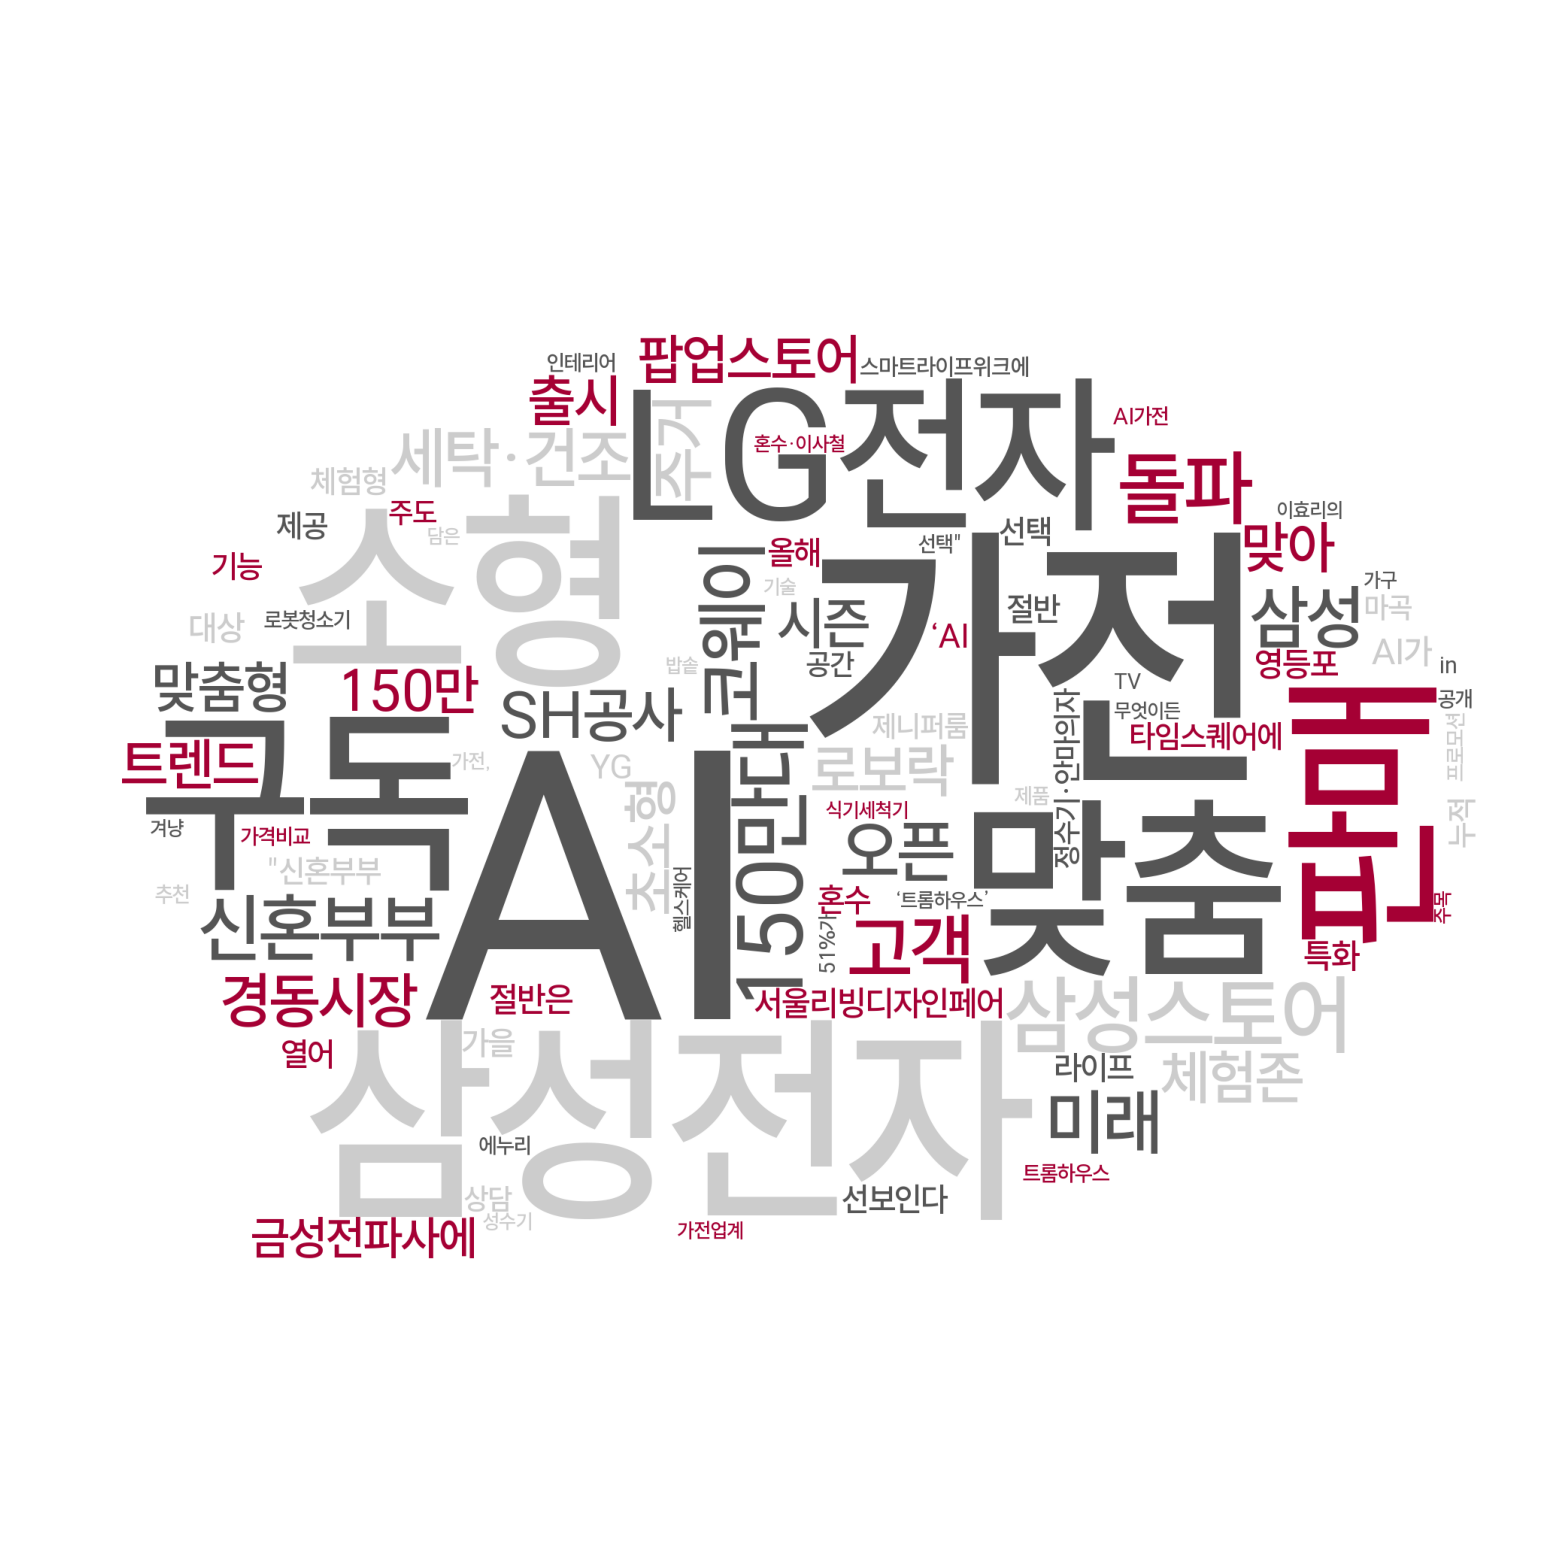

In [248]:
# 컬러를 지정하는 함수 생성
def lg_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#A50034", "#555555", "#CCCCCC"]  # LG 전자 주요 색상 (빨강, 회색 계열)
    return random.choice(colors)

mask_sam = np.array(Image.open('/Users/waynelim/Desktop/AI_School/머신러닝_비지도/data/mask/comment.png'))
#wordcloud 객체 생성
wc = WordCloud(background_color = 'white',
               random_state = 7,
               font_path = '/Users/waynelim/Library/Fonts/Freesentation-5Medium.ttf',
               colormap = 'BuGn',
               mask = mask_sam #마스크 추가
               ).generate_from_frequencies(dict(data))

# 컬러 함수 적용
wc.recolor(color_func=lg_color_func)

plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [196]:
import pandas as pd

# List of file paths for each product review CSV file
file_paths = [
    "C:/Users/lgdx2_LJH/crawling/day1/냉장고_reviews.csv",
    "C:/Users/lgdx2_LJH/crawling/day1/식기세척기_reviews.csv",
    "C:/Users/lgdx2_LJH/crawling/day1/세탁기_reviews.csv",
    "C:/Users/lgdx2_LJH/crawling/day1/건조기_reviews.csv",
    "C:/Users/lgdx2_LJH/crawling/day1/에어컨_reviews.csv",
    "C:/Users/lgdx2_LJH/crawling/day1/TV_reviews.csv",
    "C:/Users/lgdx2_LJH/crawling/day1/공기청정기_reviews.csv"
]

# Read all the CSV files and add a column for the product category
dfs = []
for file in file_paths:
    product_name = file.split('/')[-1].split('_')[0]  # Extract the product name from the file path
    df = pd.read_csv(file)
    df['product_category'] = product_name  # Add product category column
    dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())


                                              Review product_category
0  리뷰 더보기 접기 평점 5  . 신고 주거형태30평대거주인원 2인 한달사용삼성냉장고...              냉장고
1  판매자  . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...              냉장고
2                                     이 구매자의 처음 리뷰보기              냉장고
3  리뷰 더보기 접기 평점 5  . 신고 주거형태30평대거주인원 3인영유아 가정 한달사...              냉장고
4  판매자  . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...              냉장고


In [198]:
review_data = pd.read_csv("C:/Users/lgdx2_LJH/crawling/day1/냉장고_reviews.csv")

In [200]:
combined_df['Review'][0][13:14]

'5'

In [210]:
combined_df

,Review,product_category
0,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 2인 한달사용삼성냉장고...,냉장고
1,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고
2,이 구매자의 처음 리뷰보기,냉장고
3,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 3인영유아 가정 한달사...,냉장고
4,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고
...,...,...
1468,평점 5 . 신고 한달사용재구매여전히 만족하면서 사용하고 있습니다 0,공기청정기
1469,평점 5 . 신고 한달사용숨쉬기 편해진 것 같아요 만족하면서 사용중이에요 0,공기청정기
1470,"평점 5 . 신고 한달사용디자인 너무 마음에 들고, 확실히 국내 제조라 그런지 공...",공기청정기
1471,평점 5 . 신고 한달사용재구매가족이 모두 편백향에 빠졌어요 심신의 안정때문인지 ...,공기청정기


In [212]:
import re

# 전처리 함수 정의
def clean_text(text):
    unwanted_words = ["더보기", "비디오 수", "이미지 펼쳐보기", "리뷰", '접기', "신고", "스태킹", "직렬설치", "필요유무", "필요없음"]
    pattern = r'|'.join(map(re.escape, unwanted_words))
    return re.sub(pattern, '', text).strip()

# 기존 리스트에서 불필요한 단어 제거
df['combined_df'] = df['Review'].apply(clean_text)

combined_df

,Review,product_category
0,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 2인 한달사용삼성냉장고...,냉장고
1,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고
2,이 구매자의 처음 리뷰보기,냉장고
3,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 3인영유아 가정 한달사...,냉장고
4,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고
...,...,...
1468,평점 5 . 신고 한달사용재구매여전히 만족하면서 사용하고 있습니다 0,공기청정기
1469,평점 5 . 신고 한달사용숨쉬기 편해진 것 같아요 만족하면서 사용중이에요 0,공기청정기
1470,"평점 5 . 신고 한달사용디자인 너무 마음에 들고, 확실히 국내 제조라 그런지 공...",공기청정기
1471,평점 5 . 신고 한달사용재구매가족이 모두 편백향에 빠졌어요 심신의 안정때문인지 ...,공기청정기


In [208]:
df

,Review,product_category,combined_df
0,리뷰 더보기 접기 평점 3 2 . 신고 산 0 제로 15평형 한달사용냄새는 확실히...,공기청정기,평점 3 2 . 산 0 제로 15평형 한달사용냄새는 확실히줄은거같은데 구매하고나...
1,판매자 . 신고 예 감사합니다 모델에 따라 가격변경은 있습니다 오늘도 즐거운 하루...,공기청정기,판매자 . 예 감사합니다 모델에 따라 가격변경은 있습니다 오늘도 즐거운 하루 되세요
2,평점 5 . 신고 한달사용공기정화를 잘하는것 같습니다 0,공기청정기,평점 5 . 한달사용공기정화를 잘하는것 같습니다 0
3,판매자 . 신고 감사합니다 오늘도 즐거운 하루 되세요,공기청정기,판매자 . 감사합니다 오늘도 즐거운 하루 되세요
4,이 구매자의 처음 리뷰보기,공기청정기,이 구매자의 처음 보기
...,...,...,...
218,평점 5 . 신고 한달사용재구매여전히 만족하면서 사용하고 있습니다 0,공기청정기,평점 5 . 한달사용재구매여전히 만족하면서 사용하고 있습니다 0
219,평점 5 . 신고 한달사용숨쉬기 편해진 것 같아요 만족하면서 사용중이에요 0,공기청정기,평점 5 . 한달사용숨쉬기 편해진 것 같아요 만족하면서 사용중이에요 0
220,"평점 5 . 신고 한달사용디자인 너무 마음에 들고, 확실히 국내 제조라 그런지 공...",공기청정기,"평점 5 . 한달사용디자인 너무 마음에 들고, 확실히 국내 제조라 그런지 공기 ..."
221,평점 5 . 신고 한달사용재구매가족이 모두 편백향에 빠졌어요 심신의 안정때문인지 ...,공기청정기,평점 5 . 한달사용재구매가족이 모두 편백향에 빠졌어요 심신의 안정때문인지 코로...


In [214]:
print(combined_df.columns)


Index(['Review', 'product_category'], dtype='object')


In [216]:
import pandas as pd
import re

# Assuming your DataFrame is named `combined_df`

# Function to extract score from review text
def extract_score(review):
    match = re.search(r'평점\s*(\d+)', review)  # Looks for the pattern '평점 X'
    return int(match.group(1)) if match else None  # Extracts the number after '평점'

# Apply the function to extract the score from the 'Review' column
combined_df['score'] = combined_df['Review'].apply(extract_score)

# Create a new column for the score category (좋음 or 나쁨)
combined_df['score_category'] = combined_df['score'].apply(lambda x: '좋음' if x >= 3 else '나쁨')

# Display the updated DataFrame
print(combined_df[['Review', 'score', 'score_category']].head())


                                              Review  score score_category
0  리뷰 더보기 접기 평점 5  . 신고 주거형태30평대거주인원 2인 한달사용삼성냉장고...    5.0             좋음
1  판매자  . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...    NaN             나쁨
2                                     이 구매자의 처음 리뷰보기    NaN             나쁨
3  리뷰 더보기 접기 평점 5  . 신고 주거형태30평대거주인원 3인영유아 가정 한달사...    5.0             좋음
4  판매자  . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...    NaN             나쁨


In [218]:
combined_df

,Review,product_category,score,score_category
0,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 2인 한달사용삼성냉장고...,냉장고,5.0,좋음
1,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고,NaN,나쁨
2,이 구매자의 처음 리뷰보기,냉장고,NaN,나쁨
3,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 3인영유아 가정 한달사...,냉장고,5.0,좋음
4,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고,NaN,나쁨
...,...,...,...,...
1468,평점 5 . 신고 한달사용재구매여전히 만족하면서 사용하고 있습니다 0,공기청정기,5.0,좋음
1469,평점 5 . 신고 한달사용숨쉬기 편해진 것 같아요 만족하면서 사용중이에요 0,공기청정기,5.0,좋음
1470,"평점 5 . 신고 한달사용디자인 너무 마음에 들고, 확실히 국내 제조라 그런지 공...",공기청정기,5.0,좋음
1471,평점 5 . 신고 한달사용재구매가족이 모두 편백향에 빠졌어요 심신의 안정때문인지 ...,공기청정기,5.0,좋음


In [226]:
combined_df.to_csv("concated_review.csv", index=False, encoding="utf-8")

In [224]:
!pip install kiwi


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 1.0/1.0 MB 25.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for kiwi: filename=kiwi-10.2.5-py3-none-any.whl size=599130 sha256=1552fd6ba9ccf7d012542780d54090046677a693514a28a5d6c6fd6e5dce1bad
  Stored in directory: c:\users\lgdx2_ljh\appdata\local\pip\cache\wheels\43\b1\7c\a6d561c88c2a3cbffe24980c41816f57dcdb153459cff20ed4
Successfully built kiwi


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [230]:
!pip install kiwipiepy


Defaulting to user installation because normal site-packages is not writeable


In [238]:
from kiwipiepy import Kiwi
from collections import Counter

# Kiwi 토크나이저 초기화
kiwi = Kiwi()

# 리뷰 텍스트를 토큰화하는 함수
def tokenize(text):
    # 텍스트를 토큰화하고 두 글자 이상의 단어만 반환
    return [word[0] for word in kiwi.tokenize(text) if len(word[0]) > 1]

# 'Cleaned_Review' 열에 토크나이저 적용
df['tokenized_review'] = df['Review'].apply(tokenize)

# 토큰화된 단어들을 평탄화하고 빈도수 계산
all_tokens = [token for sublist in df['tokenized_review'] for token in sublist]
word_counts = Counter(all_tokens)

# 가장 빈도가 높은 10개 단어 출력
most_common_words = word_counts.most_common(10)

# 결과 출력
print(most_common_words)


[('ᆸ니다', 339), ('보기', 286), ('습니다', 245), ('제품', 238), ('신고', 221), ('어서', 203), ('리뷰', 184), ('어요', 183), ('사용', 182), ('고객', 176)]


In [286]:
from kiwipiepy import Kiwi
from collections import Counter

# Kiwi 객체 생성
kiwi = Kiwi()

# 불용어 리스트 정의
stopwords = ['신고', '보기', '평점', '펼치', '리뷰', '더보기', '이미지', '판매자', '도움', '감사', '구매', '추천', '좋아요', '사용', '만족', '드리', '숨쉬',
             '제품을', "응원", "소중하", '제품', '고객', '선택', '쉴드', '만족도', '경험', '형태', '취학', '관련', '유선', '연락','공기']

# 리뷰 텍스트를 토큰화하는 함수
def tokenize(text):
    # 텍스트를 토큰화하고 두 글자 이상의 단어만 반환, 불용어는 제외
    tokens = kiwi.tokenize(text)
    filtered_tokens = [token.form for token in tokens if token.tag in ['NNG'] and len(token.form) > 1 and token.form not in stopwords]
    return filtered_tokens

# 'Review' 열에 토크나이저 적용
df['tokenized_review'] = df['Review'].apply(tokenize)

# 토큰화된 단어들을 평탄화하고 빈도수 계산
all_tokens = [token for sublist in df['tokenized_review'] for token in sublist]
word_counts = Counter(all_tokens)

# '가격' 단어를 강제로 빈도수에 추가 (빈도수를 높이기 위해 충분히 많은 횟수로 추가)
word_counts['가격'] += 70  # 예시로 '가격'을 100번 추가
word_counts['디자인'] += 20
word_counts['신혼'] += 0
# 가장 빈도가 높은 100개 단어 출력
most_common_words = word_counts.most_common(50)

# 결과 출력
print("가장 빈도가 높은 100개 단어:", most_common_words)


가장 빈도가 높은 100개 단어: [('화이트', 96), ('가격', 86), ('환경', 75), ('디자인', 73), ('주거', 64), ('건강', 64), ('비염', 64), ('성능', 63), ('필요', 62), ('소음', 60), ('클린', 60), ('청정기', 58), ('후기', 57), ('가정', 55), ('먼지', 54), ('담배', 53), ('편안', 49), ('필터', 45), ('작동', 45), ('알레르기', 45), ('상품', 44), ('살균', 41), ('효과', 40), ('미세', 40), ('일반', 40), ('세트', 40), ('노력', 40), ('서비스', 37), ('에어', 37), ('냄새', 34), ('모드', 34), ('사진', 31), ('비디오', 30), ('아이', 29), ('사이즈', 28), ('배송', 27), ('편리', 26), ('생각', 25), ('영유아', 25), ('행사', 25), ('설치', 24), ('공간', 23), ('확인', 23), ('행복', 23), ('생활', 22), ('개선', 22), ('소형', 21), ('필수', 21), ('색상', 21), ('미니', 21)]


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


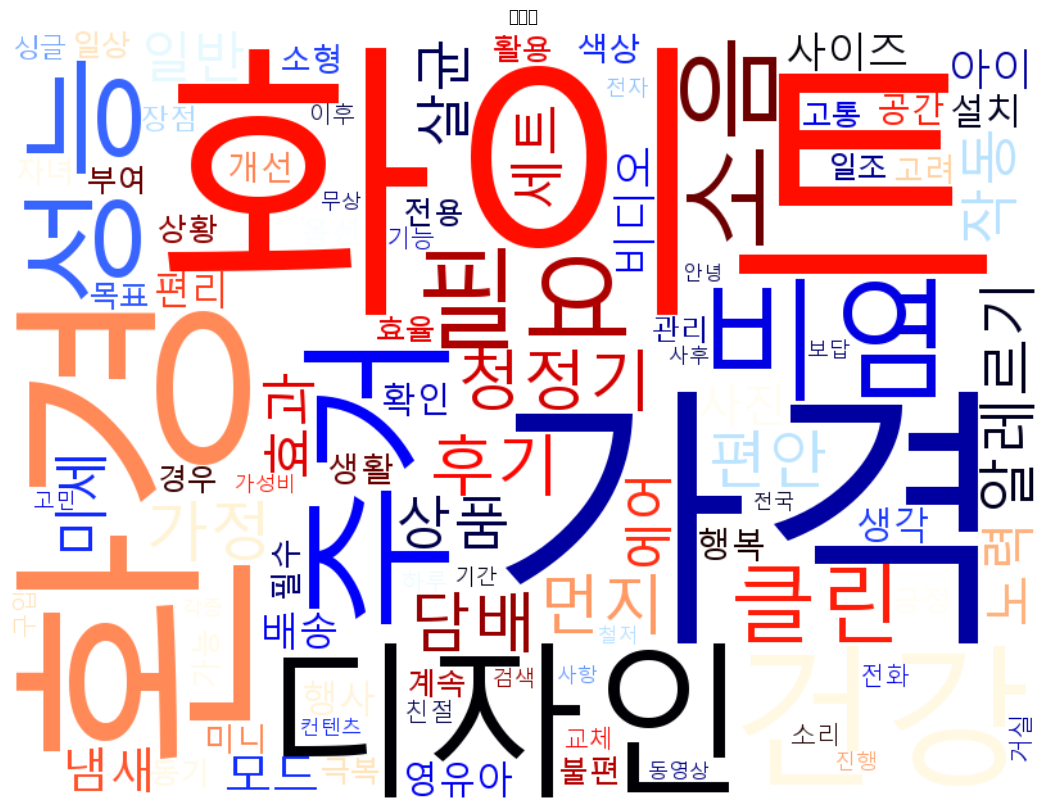

In [287]:
from kiwipiepy import Kiwi
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 글꼴 설정 (Windows에 따라 경로가 다를 수 있음)
    width=800,
    height=600,
    background_color='white',
    max_words=100,
    colormap='flag',
).generate_from_frequencies(word_counts)

# 워드클라우드 출력
plt.figure(figsize=(16, 10))
plt.title("짜자잔")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 축 숨기기
plt.show()

In [179]:
df

,Review,product_category,score,score_category
0,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 2인 한달사용삼성냉장고...,냉장고,5.0,좋음
1,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고,NaN,나쁨
2,이 구매자의 처음 리뷰보기,냉장고,NaN,나쁨
3,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 3인영유아 가정 한달사...,냉장고,5.0,좋음
4,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고,NaN,나쁨
...,...,...,...,...
1468,평점 5 . 신고 한달사용재구매여전히 만족하면서 사용하고 있습니다 0,공기청정기,5.0,좋음
1469,평점 5 . 신고 한달사용숨쉬기 편해진 것 같아요 만족하면서 사용중이에요 0,공기청정기,5.0,좋음
1470,"평점 5 . 신고 한달사용디자인 너무 마음에 들고, 확실히 국내 제조라 그런지 공...",공기청정기,5.0,좋음
1471,평점 5 . 신고 한달사용재구매가족이 모두 편백향에 빠졌어요 심신의 안정때문인지 ...,공기청정기,5.0,좋음


In [181]:
df['score_category'] = df['score'].apply(lambda x: '좋음' if x >= 3 else '나쁨')

# Display the DataFrame
df


,Review,product_category,score,score_category
0,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 2인 한달사용삼성냉장고...,냉장고,5.0,좋음
1,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고,NaN,나쁨
2,이 구매자의 처음 리뷰보기,냉장고,NaN,나쁨
3,리뷰 더보기 접기 평점 5 . 신고 주거형태30평대거주인원 3인영유아 가정 한달사...,냉장고,5.0,좋음
4,"판매자 . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...",냉장고,NaN,나쁨
...,...,...,...,...
1468,평점 5 . 신고 한달사용재구매여전히 만족하면서 사용하고 있습니다 0,공기청정기,5.0,좋음
1469,평점 5 . 신고 한달사용숨쉬기 편해진 것 같아요 만족하면서 사용중이에요 0,공기청정기,5.0,좋음
1470,"평점 5 . 신고 한달사용디자인 너무 마음에 들고, 확실히 국내 제조라 그런지 공...",공기청정기,5.0,좋음
1471,평점 5 . 신고 한달사용재구매가족이 모두 편백향에 빠졌어요 심신의 안정때문인지 ...,공기청정기,5.0,좋음


In [186]:
import re

# 전처리 함수 정의
def clean_text(text):
    unwanted_words = ["더보기", "비디오 수", "이미지 펼쳐보기", "리뷰", '접기', "신고", "스태킹", "직렬설치", "필요유무", "필요없음"]
    pattern = r'|'.join(map(re.escape, unwanted_words))
    return re.sub(pattern, '', text).strip()

# 기존 리스트에서 불필요한 단어 제거
df['Cleaned_Review'] = df['Review'].apply(clean_text)

# 결과 확인
print(df[['Review', 'Cleaned_Review']].head())


                                              Review  \
0  리뷰 더보기 접기 평점 5  . 신고 주거형태30평대거주인원 2인 한달사용삼성냉장고...   
1  판매자  . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...   
2                                     이 구매자의 처음 리뷰보기   
3  리뷰 더보기 접기 평점 5  . 신고 주거형태30평대거주인원 3인영유아 가정 한달사...   
4  판매자  . 신고 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다...   

                                      Cleaned_Review  
0  평점 5  .  주거형태30평대거주인원 2인 한달사용삼성냉장고. 완전. 최고최고입니...  
1  판매자  .  안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다. ...  
2                                       이 구매자의 처음 보기  
3  평점 5  .  주거형태30평대거주인원 3인영유아 가정 한달사용설치할 때 기사님들도...  
4  판매자  .  안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다. ...  


In [190]:
# Create a new DataFrame with only the 'Cleaned_Review' column
cleaned_df = df[['Cleaned_Review']]

# Display the new DataFrame
cleaned_df


,Cleaned_Review
0,평점 5 . 주거형태30평대거주인원 2인 한달사용삼성냉장고. 완전. 최고최고입니...
1,"판매자 . 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다. ..."
2,이 구매자의 처음 보기
3,평점 5 . 주거형태30평대거주인원 3인영유아 가정 한달사용설치할 때 기사님들도...
4,"판매자 . 안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다. ..."
...,...
1468,평점 5 . 한달사용재구매여전히 만족하면서 사용하고 있습니다 0
1469,평점 5 . 한달사용숨쉬기 편해진 것 같아요 만족하면서 사용중이에요 0
1470,"평점 5 . 한달사용디자인 너무 마음에 들고, 확실히 국내 제조라 그런지 공기 ..."
1471,평점 5 . 한달사용재구매가족이 모두 편백향에 빠졌어요 심신의 안정때문인지 코로...


In [194]:
import pandas as pd
import re

# Assuming your DataFrame is named `combined_df`

# Function to extract score from review text
def extract_score(review):
    match = re.search(r'평점\s*(\d+)', review)  # Looks for the pattern '평점 X'
    return int(match.group(1)) if match else None  # Extracts the number after '평점'

# Apply the function to extract the score from the 'Review' column
cleaned_df['score'] = cleaned_df['Cleaned_Review'].apply(extract_score)

# Create a new column for the score category (좋음 or 나쁨)
cleaned_df['score_category'] = cleaned_df['score'].apply(lambda x: '좋음' if x >= 3 else '나쁨')

# Display the updated DataFrame
print(cleaned_df[['Cleaned_Review', 'score', 'score_category']].head())

                                      Cleaned_Review  score score_category
0  평점 5  .  주거형태30평대거주인원 2인 한달사용삼성냉장고. 완전. 최고최고입니...    5.0             좋음
1  판매자  .  안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다. ...    NaN             나쁨
2                                       이 구매자의 처음 보기    NaN             나쁨
3  평점 5  .  주거형태30평대거주인원 3인영유아 가정 한달사용설치할 때 기사님들도...    5.0             좋음
4  판매자  .  안녕하세요, 고객님. 삼성전자 온라인 공식 인증점 평강프라자입니다. ...    NaN             나쁨


C:\Users\lgdx2_LJH\AppData\Local\Temp\ipykernel_18136\1786890743.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['score'] = cleaned_df['Cleaned_Review'].apply(extract_score)
C:\Users\lgdx2_LJH\AppData\Local\Temp\ipykernel_18136\1786890743.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['score_category'] = cleaned_df['score'].apply(lambda x: '좋음' if x >= 3 else '나쁨')


In [283]:
review_clean_morphs = []

for i in tqdm(data_temp['review']):
    #하나의 doc을 한 문장으로 병합(리스트 하나에 리스트의 형태)
    temp = ' '.join(i)
    doc_morphs = kiwi.tokenize(temp)
    
    morphs_list = []
    #일반명사, 동사, 형용사만 추출
    for j in doc_morphs:
        if j.tag in ['NNG', 'VV', 'VA']:
            morphs_list.append(j.form)
    review_clean_morphs.append(' '.join(morphs_list))

100%|██████████| 180/180 [00:01<00:00, 178.44it/s]


In [281]:
review_clean_morphs

['스 태 킹 직 렬 키 트 필 요 없 형 태 주 인 취 학 녀 쓰 가 전 품 하 여 름 컨 보 기 보 내 일 하 기 보 시 없 빨 래 꾸 검 색 서 알 되 지 품 지 청 나 하 인 과 짜 도 정 있 기 기 료 하 오 땡 희 집 래 되 파 트 창 문 리 되 기 들 서 결 국 담 날 차 까 동 하 배 송 하 상 기 배 하 차 니 가 알 사 트 서 기 하 주 비 용 발 생 원 날 짜 배 가 곳 있 배 송 완 료 습 감 사 합 보 사 비 디 수 지 펴 치',
 '스 태 킹 직 렬 키 트 필 요 없 형 태 주 인 사 하 때 맞 추 매 정 도 기 상 품 입 쓰 기 아 직 장 나 때 히 팔 매 되 기 보 때 때 사 야 서 하 결 하 족 도 높 습 림 전 끄 씬 좋 뷰 처 럼 완 조 용 희 집 래 전 쓰 지 트 롬 키 짜 보 내 말 사 하 애 쓰 폐 가 감 사 역 지 쓰 좋 습 니 쓰 있 됩 니 쓰 보 지 펴 치',
 '스 태 킹 직 렬 키 트 필 요 없 형 태 주 인 혼 부 부 사 용 바 꾸 용 으 매 용 으 사 겉 사 사 과 슷 해 기 부 드 럼 통 사 때 문 용 좋 같 음 적 간 줄 서 기 사 용 하 좋 배 바 오 설 하 루 전 배 화 오 설 입 가 가 폭 맞 형 냉 동 켜 우 들 걱 정 각 보 동 키 서 하 리 배 기 사 하 침 승 기 검 간 때 서 층 까 들 오 때 하 감 사 합 좋 적 극 추 보',
 '스 태 킹 직 렬 키 트 필 요 없 형 태 주 인 진 짜 사 설 하 빨 오 하 가 폐 기 가 쓰 기 되 데 쇼 핑 길 래 알 림 약 때 사 기 상 품 완 전 스 습 주 좋 습 다 약 혜 택 까 하 서 가 살 있 서 런 기 회 치 되 전 쓰 장 나 많 쓰 맞 요 고 많 하 정 들 보 내 기 오 틀 배 송 니 좋 덜 진 없 기 돌 소 크 른 뷰 용 희 집 런 가 가 르 기 합 니 속 하 쓰 야 급 보 사 비 디 수 지 펴 치',
 '스 태 킹 직 렬 키 트 필 요 없 천 서 배 청 빠 르 절 서 하 수 도 안 패 킹 낡 세 물 세 확 인 서 치 있 품 기 본 충 실 

In [11]:
review = pd.read_csv("C:/Users/lgdx2_LJH/crawling/day1/식기세척기_reviews.csv")

In [19]:
review

,Review
0,리뷰 더보기 접기 평점 5 . 신고 제품선택 세이버 초음파세척기 그랜드 패널색상 ...
1,"판매자 . 신고 안녕하세요, 친환경 위생 기업 세이버입니다 저희 가정용 초음파 식..."
2,리뷰 더보기 접기 평점 5 . 신고 제품선택 세이버 초음파세척기 고급형 패널색상 ...
3,"판매자 . 신고 안녕하세요, 친환경 위생 기업 세이버입니다 저희 가정용 초음파 식..."
4,리뷰 더보기 접기 평점 5 . 신고 제품선택 세이버 초음파세척기 그랜드 패널색상 ...
...,...
195,리뷰 더보기 접기 평점 5 . 신고 도어색상 선택 코타화이트 주거형태거주인원 3인...
196,판매자 . 신고 안녕하세요. 삼성공식온라인 파트너 주 문성전자입니다. 제품 사용에...
197,리뷰 더보기 접기 평점 5 . 신고 도어색상 선택 코타화이트 주거형태거주인원 3인...
198,리뷰 더보기 접기 평점 5 . 신고 도어색상 선택 코타화이트 주거형태거주인원 4인...
